In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [25]:
matdata = loadmat('Data/Lab 8/ex8data1.mat')
X = matdata['X']
X_VAL = matdata['Xval']
Y_VAL = matdata['yval']

print('X:    ', X.shape)
print('Xval: ', X_VAL.shape)
print('Yval: ', Y_VAL.shape)

X:     (307, 2)
Xval:  (307, 2)
Yval:  (307, 1)


Text(0.5,1,'X_VAL')

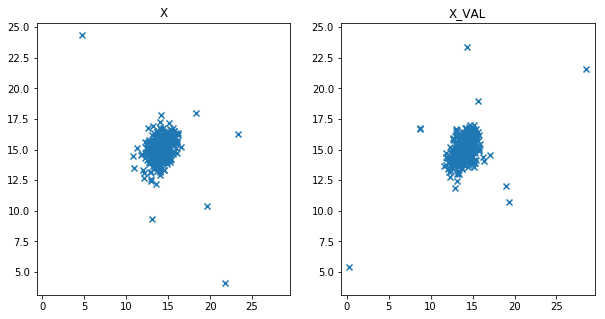

In [26]:
_, ax = plt.subplots(1, 2, figsize=(10,5))

Xmin = min(X[:, 0].min(), X_VAL[:, 0].min()) - 1
Xmax = max(X[:, 0].max(), X_VAL[:, 0].max()) + 1

Ymin = min(X[:, 1].min(), X_VAL[:, 1].min()) - 1
Ymax = max(X[:, 1].max(), X_VAL[:, 1].max()) + 1

for axi in ax:
    axi.set_xlim(Xmin, Xmax)
    axi.set_ylim(Ymin, Ymax)


ax[0].scatter(*X.T, marker='x')
ax[0].set_title('X')

ax[1].scatter(*X_VAL.T, marker='x')
ax[1].set_title('X_VAL')

In [27]:
def gaussian1d(x, μ, σ_sqr):
    return np.exp( -(x - μ)**2 / (2*σ_sqr) ) / np.sqrt(2 * np.pi * σ_sqr)
     
    
def gaussianNd(x, μ, σ_sqr):
    prd = np.array([
        gaussian1d(xi, μi, σ_sqr_i) 
        for xi, μi, σ_sqr_i in zip(x, μ, σ_sqr)])
    return np.product(prd, axis=0)

μ   : [14.11222578 14.99771051]
σ**2: [1.83263141 1.70974533]


Text(0.5,1,'X[1]')

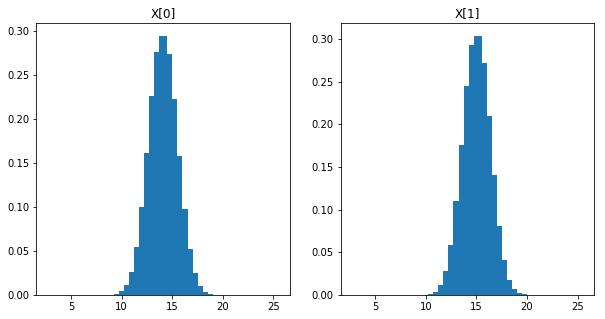

In [28]:
M, N = X.shape
_, ax = plt.subplots(1, N, figsize=(5*N, 5))


μ = X.mean(axis=0)
σ_sqr = X.var(axis=0)
print(f'μ   : {μ}')
print(f'σ**2: {σ_sqr}')

xmin, xmax = X.min() - 1, X.max() + 1
x = np.arange(xmin, xmax, 0.5)

for axi, μi, σ_sqr_i in zip(ax, μ, σ_sqr):
    y = gaussian1d(x, μi, σ_sqr_i)
    axi.bar(x, y)

ax[0].set_title('X[0]')
ax[1].set_title('X[1]')

Text(0,0.5,'X1')

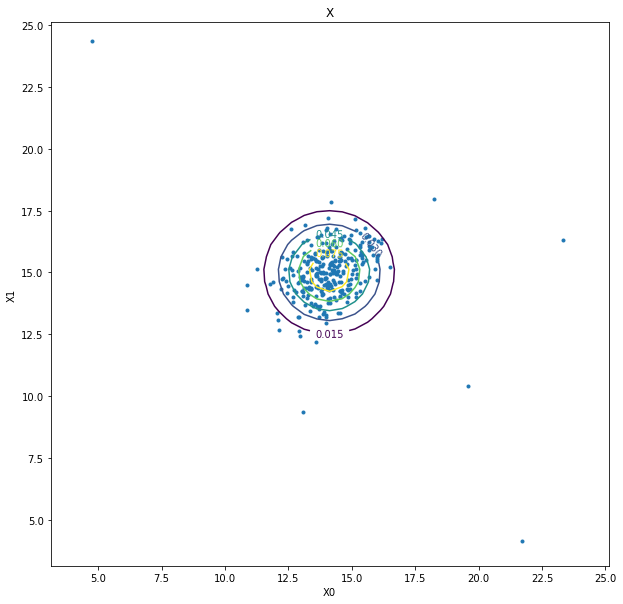

In [29]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))

xmin, xmax = X.min() - 1, X.max() + 1

x = np.arange(xmin, xmax, .5)
y = np.arange(xmin, xmax, .5)
xx, yy = np.meshgrid(x, y)

zz = gaussianNd([xx, yy], μ, σ_sqr)

cs = ax.contour(xx, yy, zz)
ax.clabel(cs, fontsize=10)
ax.scatter(*X.T, marker='.')

ax.set_title('X')
ax.set_xlabel('X0')
ax.set_ylabel('X1')

In [30]:
def f1score_fn(ϵ, x, y_true, μ, σ_sqr):
    y_pred = gaussianNd(x, μ, σ_sqr) < ϵ

    tp = np.count_nonzero((y_pred == 1) & (y_true == 1))
    fp = np.count_nonzero((y_pred == 1) & (y_true == 0))
    fn = np.count_nonzero((y_pred == 0) & (y_true == 1))
    tn = np.count_nonzero((y_pred == 0) & (y_true == 0))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + fp + fn + tn)

    return 2*precision*recall / (precision + recall)

1.7001e-05


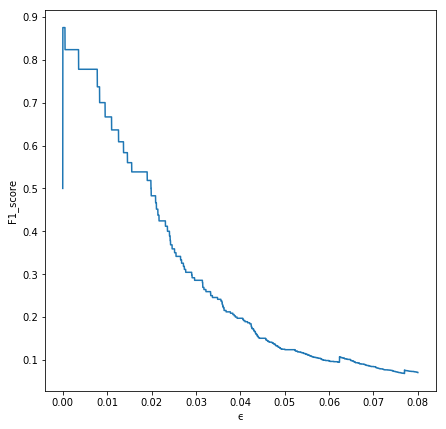

In [33]:
x = X_VAL.T
y = np.hstack(Y_VAL)


xx = np.arange(10**(-9), .08, 10**(-6))
yy = np.array([f1score_fn(ϵ, x, y, μ, σ_sqr) for ϵ in xx])

_, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(xx, yy)
ax.set_xlabel('ϵ')
ax.set_ylabel('F1_score')

idx = yy.argmax()
ϵ = xx[idx]
print(ϵ)

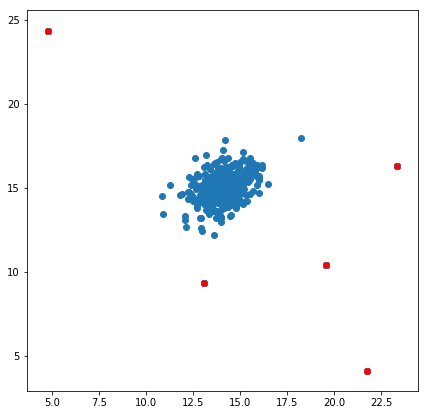

In [34]:
y = gaussianNd(X.T, μ, σ_sqr) < ϵ
idx, *_ = np.where(y == True)

_, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.scatter(X[:, 0], X[:, 1])
ax.scatter(X[idx, 0], X[idx, 1], c='red', marker='X')

In [35]:
matdata = loadmat('Data/Lab 8/ex8data2.mat')

X = matdata['X']
X_VAL = matdata['Xval']
Y_VAL = matdata['yval']

print('X:    ', X.shape)
print('Xval: ', X_VAL.shape)
print('Yval: ', Y_VAL.shape)

X:     (1000, 11)
Xval:  (100, 11)
Yval:  (100, 1)


In [36]:
M, N = X.shape
# _, ax = plt.subplots(N, 1, figsize=(5, 5*N))

μ = X.mean(axis=0)
σ_sqr = X.var(axis=0)
print(f'μ   : {μ}')
print(f'σ**2: {σ_sqr}')

# xmin, xmax = X.min() - 1, X.max() + 1
# x = np.arange(xmin, xmax, 0.5)
# for axi, μi, σ_sqr_i in zip(ax, μ, σ_sqr):
#     y = gaussian1d(x, μi, σ_sqr_i)
#     axi.bar(x, y)

μ   : [  4.93940034  -9.63726819  13.81470749 -10.4644888   -7.95622922
  10.19950372  -6.01940755   7.96982896  -6.2531819    2.32451289
   8.47372252]
σ**2: [60.97489373 53.20572186 58.51546272 84.20403725 65.26859177 89.57487757
 55.63349911 87.16233783 29.62926829 70.7852052  50.50356719]


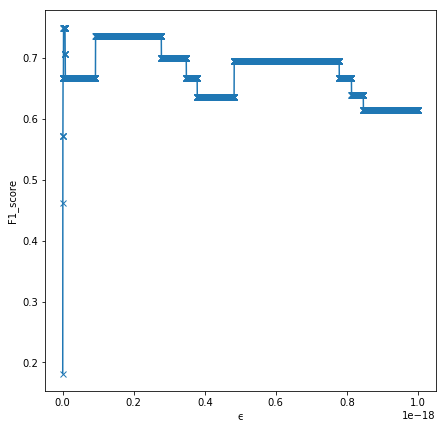

In [37]:
x = X_VAL.T
y = np.hstack(Y_VAL)

xx = np.arange(1e-25, 1e-18, 10e-23)
yy = np.array([f1score_fn(ϵ, x, y, μ, σ_sqr) for ϵ in xx])

_, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(xx, yy, marker='x')
ax.set_xlabel('ϵ')
ax.set_ylabel('F1_score')

idx = yy.argmax()
ϵ = xx[idx]

In [38]:
ϵ

2.0001000000000002e-21

In [39]:
y = gaussianNd(X.T, μ, σ_sqr) < ϵ
idx, *_ = np.where(y == True)
len(X[idx])

8

In [40]:
 np.where(y == True)

(array([ 30,  79, 421, 456, 478, 674, 685, 702]),)